# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The main aims of the prac are: 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (20%)

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [2]:
### Your code here
# load the bike rental data
bike = pd.read_csv("SeoulBikeData.csv")

#look at the first 5 of data
bike.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes


In [3]:
# look at the dataset info
'''
Rainfall(mm) and Snowfall (cm) are object. it should be in numeric
'''
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
# pd.set_option("display.max_rows", None)
# checking the Rainfall column unique values
'''
Apparently there is string called "No Record" as value in the column
'''
bike['Rainfall(mm)'].value_counts()[0:49]

0            8207
0.5           116
1              66
1.5            56
0.1            46
2              31
2.5            23
No Record      23
0.2            20
3.5            18
0.4            16
4              14
3              14
0.3             9
5.5             8
4.5             7
6               6
9.5             6
6.5             5
5               5
9               4
1.6             3
7               3
0.9             3
0.8             3
8               3
18              2
13              2
6.4             2
1.1             2
18.5            2
8.5             2
13.5            2
7.5             1
1.3             1
24              1
7.3             1
3.7             1
15.5            1
29.5            1
21              1
21.5            1
1.2             1
9.1             1
12              1
10.5            1
4.9             1
14.5            1
16              1
Name: Rainfall(mm), dtype: int64

In [5]:
# check if there null cell in the Rainfall column
bike[(bike['Rainfall(mm)'].isnull())]

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1049,13/01/2018,277,17,-1.4,68,1.0,761,-6.5,0.11,NaN,0,Winter,No Holiday,Yes
1057,14/01/2018,150,1,-3.7,79,0.9,438,-6.8,0.00,NaN,0,Winter,No Holiday,Yes


In [6]:
# checking the Snowfall column unique values
# Apparently there is string called "No Record" as value in the column
bike['Snowfall (cm)'].value_counts()[0:49]

0            8294
0.3            42
1              39
0.9            34
0.5            34
0.7            31
No Record      23
0.8            22
2              22
0.4            21
1.6            19
2.2            18
0.6            15
0.2            15
3.5            14
2.6            12
2.5            10
1.2             8
2.7             6
3               5
1.8             5
3.2             4
4.1             4
1.3             4
4               4
3.7             3
3.8             3
2.3             3
2.1             3
1.9             3
1.7             3
2.4             3
1.1             3
3.3             3
4.8             2
8.8             2
2.8             2
3.4             2
4.3             2
3.9             2
1.4             2
0.1             2
5               2
2.9             2
5.1             1
3.1             1
1.5             1
4.2             1
7.1             1
Name: Snowfall (cm), dtype: int64

In [7]:
# check if there null cell in the Snowfall column
bike[(bike['Snowfall (cm)'].isnull())]

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [8]:
# look at the summary of the data
bike.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


In [9]:
bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# look at the null data
# wind_speed, Dew point temperature (C) and Rainfall(mm) have null value,
bike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature (C)              0
Humidity (%)                 0
Wind speed (m/s)             1
Visibility (10m)             0
Dew point temperature (C)    1
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 2
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### 1.2 Initial visualisation

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

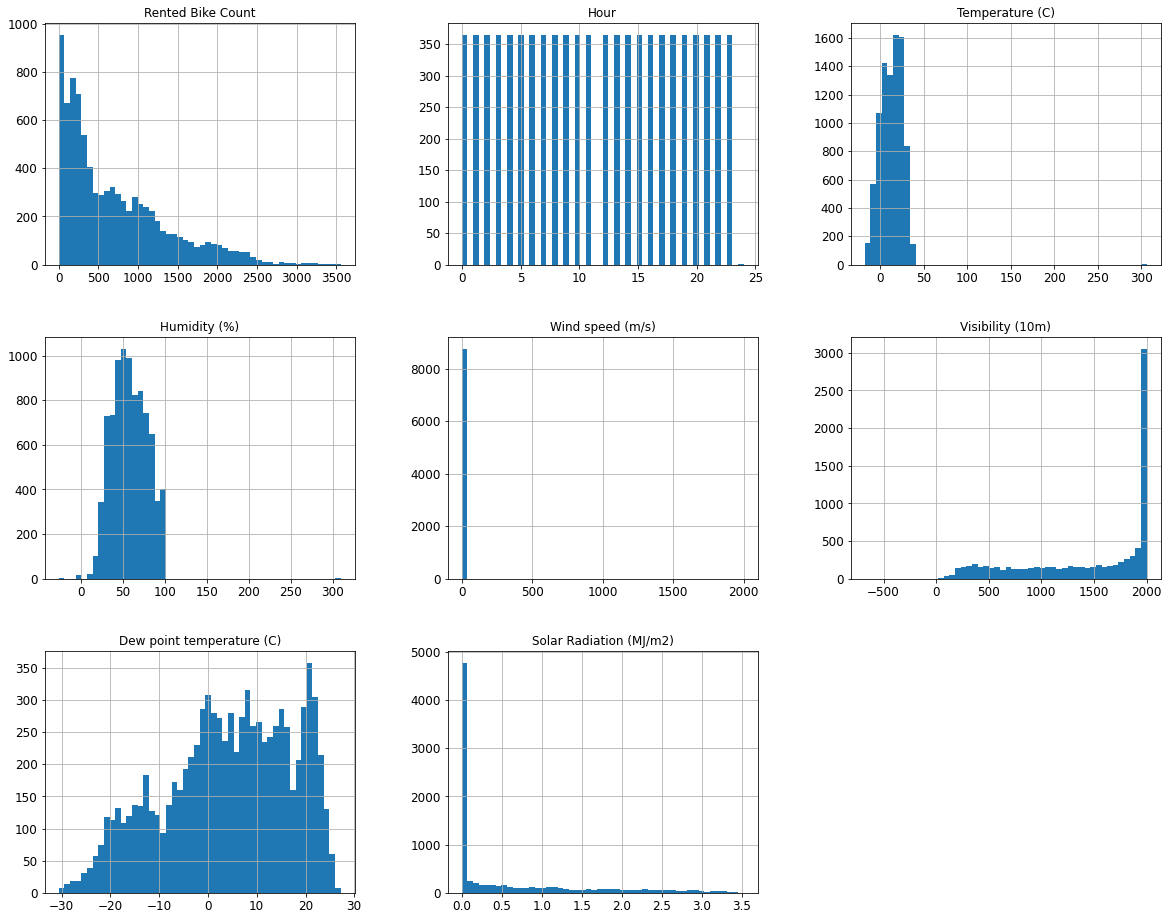

In [11]:
### Your code here
# Check if expected range of each variables? is it between the range?
bike.hist(bins=50, figsize=(20, 16)) 
plt.show()

### 1.3 Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so **remove rows from the DataFrame where the business is closed.** Hint: you can use the `DataFrame.loc()` function to do this. As a sanity check, ensure that the rows you are removing contain zero bike rentals! **After doing this, delete the Functioning Day feature from the DataFrame** and verify that this worked.

In [12]:
### Your code here
# filter the row when functioning day == "Yes"
# bike.loc[bike["Functioning Day"] != "Yes"]
bike_no = bike.loc[bike["Functioning Day"] != "Yes"]

# Updating the bike dataset to the "Functioning Day" == "Yes"
bike = bike.loc[bike["Functioning Day"] == "Yes"]
bike

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,Autumn,No Holiday,Yes


In [13]:
# check the removal bike on the fuctioning day is 0
bike_no['Rented Bike Count'].value_counts(normalize=False)

0    295
Name: Rented Bike Count, dtype: int64

In [14]:
# Drop the Functioning_Day column from the dataset.
# the Functioning Day column is no longer available
bike = bike.drop(['Functioning Day'],axis=1)
bike

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,Autumn,No Holiday


### 1.4 Numerical encoding

The main task is to predict future bike rental demand from this data. Hence the target feature is "Bike Rental Count". You will use regression techniques to do this, but this requires that the other features are numerical.

The Holiday and Season features both need to be converted to a simple numerical format. **Write code to convert the Holiday feature to 0 or 1 from its current format.** 

In [15]:
### Your code here
# check Holiday column for unique value
bike['Holiday'].value_counts(normalize=False)

No Holiday    8057
Holiday        408
Name: Holiday, dtype: int64

In [16]:
# Convert the Holiday feature to 0 == No Holiday and 1 == Holiday
bike['Holiday'].replace({"Holiday": 1, "No Holiday": 0}, inplace=True)

In [17]:
bike['Holiday'].value_counts()

0    8057
1     408
Name: Holiday, dtype: int64

In [18]:
bike

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,Autumn,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,Autumn,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,Autumn,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,Autumn,0


The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [19]:
# Create dummy variables for the 'Seasons' column
season_dummies = pd.get_dummies(bike['Seasons'])

# Concatenate the dummy variables with the original 'bike' DataFrame
bike = pd.concat([bike, season_dummies], axis=1)

# Drop the 'Seasons' column
bike = bike.drop(['Seasons'], axis=1)

In [20]:
# check the new added columns
bike

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,0,1,0,0,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,0,1,0,0,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,0,1,0,0,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,0,1,0,0,0


It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [21]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:
bike['Date']=bike['Date'].transform(date_is_weekday)

# change the Date column name to Weekday
bike.rename(columns={"Date": "Weekday"},inplace=True)

In [22]:
# check the Date column 
bike

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,0,1,0,0,0
8756,1,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,0,1,0,0,0
8757,1,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,0,1,0,0,0
8758,1,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,0,1,0,0,0


**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [23]:
### Your code here
#check the data type
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Weekday                    8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8463 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Holiday                    8465 non-null   int64  
 12  Autumn                     8465 non-null   uint8  
 13  Spring                     8465 non-null   uint8

In [24]:
# convert Rainfall(mm) and Snowfall (cm) to numeric
bike = bike.apply(pd.to_numeric, errors="coerce")
bike

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,0,0,0
8756,1,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,0,0,0
8757,1,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,0,0,0
8758,1,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,0,0,0


In [25]:
#check the data type and the null columns
bike.info()
bike.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Weekday                    8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8440 non-null   float64
 10  Snowfall (cm)              8442 non-null   float64
 11  Holiday                    8465 non-null   int64  
 12  Autumn                     8465 non-null   uint8  
 13  Spring                     8465 non-null   uint8

Weekday                       0
Rented Bike Count             0
Hour                          0
Temperature (C)               0
Humidity (%)                  0
Wind speed (m/s)              1
Visibility (10m)              0
Dew point temperature (C)     1
Solar Radiation (MJ/m2)       0
Rainfall(mm)                 25
Snowfall (cm)                23
Holiday                       0
Autumn                        0
Spring                        0
Summer                        0
Winter                        0
dtype: int64

## Step 2: Visualise the data and perform further processing (20%)

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

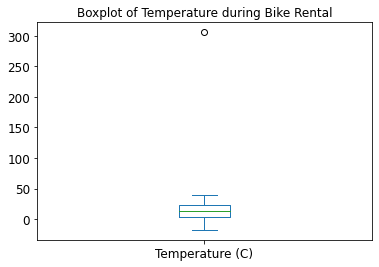

In [26]:
# There is one outlier in the temperature where the temperature is more than 300 degree celcius. 
# It might be the data had been entered wrongly.
# temperature can range between negative to positive as it consistent with seasonal changes but above 300 degree celcius is
# a little bit absurd.

bike['Temperature (C)'].plot(kind='box')
plt.title('Boxplot of Temperature during Bike Rental')
plt.show()

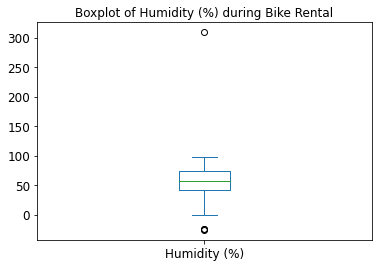

In [27]:
# There are few outliers in the humidity where the humidity is more than 300 % and below 0 %.
# It might be the data had been entered wrongly.
# humidity can range from 0% to an extreme level up to 200% but above 300% might be impossible.
bike['Humidity (%)'].plot(kind='box')
plt.title('Boxplot of Humidity (%) during Bike Rental')
plt.show()

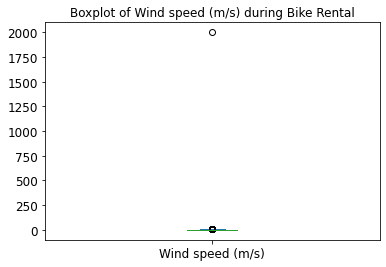

In [28]:
# There is one outlier in the wind speed where the speed is more than 2000 m/s that is equavalent to 7200 km/h
# It might be the data had been entered wrongly.
# speed can range 0 to hundreds but up to 2000 m/s might be impossible.
bike['Wind speed (m/s)'].plot(kind='box')
plt.title('Boxplot of Wind speed (m/s) during Bike Rental')
plt.show()

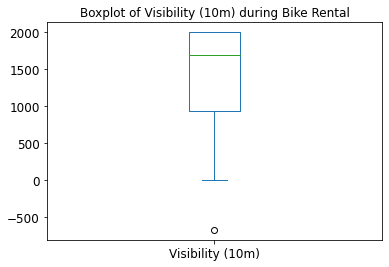

In [29]:
# There is one outlier in the visibility where the visibility is less than 0 ie -500.
# It might be the data had been entered wrongly.
bike['Visibility (10m)'].plot(kind='box')
plt.title('Boxplot of Visibility (10m) during Bike Rental')
plt.show()

In [30]:
# Your summary sentence about problematic entries

#Temperature:
#There is one outlier in the temperature where the temperature is more than 300 degree celcius. 
#It might be the data had been entered wrongly.
#Temperature can range between negative to positive as it consistent with seasonal changes but above 300 degree celcius
#is impossible.

#Humidity:
#There are few outliers in the humidity where the humidity is more than 300 % and below 0 %.
#It might be the data had been entered wrongly. Humidity can from 0% 5 to an extreme level up to 200% 
#but above 300% might be impossible.

#Wind speed:
#There is one outlier in the wind speed where the speed is more than 2000 m/s that is equavalent to 7200 km/h.
#It might be the data had been entered wrongly. Wind speed can range 0 to hundreds but up to 2000 m/s might be impossible.

#Visibility:
# There is one outlier in the visibility where the visibility is less than 0 ie -500. Visibility should be in positive
# value range.It might be the data had been entered wrongly.


### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [31]:
# Replacing the outlier values by setting it to np.nan

def replace_outliers_with_nan(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df.loc[df[column_name] < low_limit, column_name] = np.nan
    df.loc[df[column_name] > upper_limit, column_name] = np.nan

replace_outliers_with_nan(bike, "Temperature (C)")
replace_outliers_with_nan(bike, "Wind speed (m/s)")
replace_outliers_with_nan(bike, "Humidity (%)")
replace_outliers_with_nan(bike, "Visibility (10m)")

In [32]:
# checking the columns
bike.isnull().sum()

Weekday                        0
Rented Bike Count              0
Hour                           0
Temperature (C)                1
Humidity (%)                   4
Wind speed (m/s)             156
Visibility (10m)               1
Dew point temperature (C)      1
Solar Radiation (MJ/m2)        0
Rainfall(mm)                  25
Snowfall (cm)                 23
Holiday                        0
Autumn                         0
Spring                         0
Summer                         0
Winter                         0
dtype: int64

In [33]:
# Checking the outliers rows that has been updated to np.nan. 
bike[(bike['Temperature (C)'].isnull() | bike['Humidity (%)'].isnull() | bike['Visibility (10m)'].isnull() 
      | bike['Wind speed (m/s)'].isnull())]

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter
82,1,311,10,-1.1,40.0,NaN,2000.0,-13.0,0.64,0.0,0.0,0,0,0,0,1
84,1,393,12,-0.3,38.0,NaN,1823.0,-12.9,1.11,0.0,0.0,0,0,0,0,1
85,1,391,13,0.0,30.0,NaN,1938.0,-15.5,1.17,0.0,0.0,0,0,0,0,1
86,1,338,14,0.1,27.0,NaN,2000.0,-16.7,1.09,0.0,0.0,0,0,0,0,1
87,1,341,15,-0.1,25.0,NaN,2000.0,-17.8,0.88,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7932,0,1076,12,10.4,41.0,NaN,1966.0,-2.3,1.33,0.0,0.0,0,1,0,0,0
7933,0,1118,13,10.6,38.0,NaN,2000.0,-3.1,1.63,0.0,0.0,0,1,0,0,0
7934,0,1183,14,10.8,37.0,NaN,2000.0,-3.3,1.29,0.0,0.0,0,1,0,0,0
7937,0,1176,17,9.5,34.0,NaN,2000.0,-5.6,0.45,0.0,0.0,0,1,0,0,0


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Specifying imputation using median of the affected columns
# Normalize the data especially for the categorical columns such Seasons, Date and Holiday columns
num_pipeline = Pipeline([
("impute", SimpleImputer(strategy="median")),
("standardize",StandardScaler())])

### 2.3 Correlation 

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. **Why is it important to not use this version of the pre-processed data again?**

In [35]:
### Your code here
bike_temp = bike.copy()
num_pipeline.fit(bike_temp)
filled_biked = num_pipeline.transform(bike_temp)

In [36]:
# checkin the Pipeline if it working on the dataset copy
filled_features = pd.DataFrame(filled_biked, columns=bike_temp.columns,
index=bike.index)
filled_features.isnull().sum()

Weekday                      0
Rented Bike Count            0
Hour                         0
Temperature (C)              0
Humidity (%)                 0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature (C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Holiday                      0
Autumn                       0
Spring                       0
Summer                       0
Winter                       0
dtype: int64

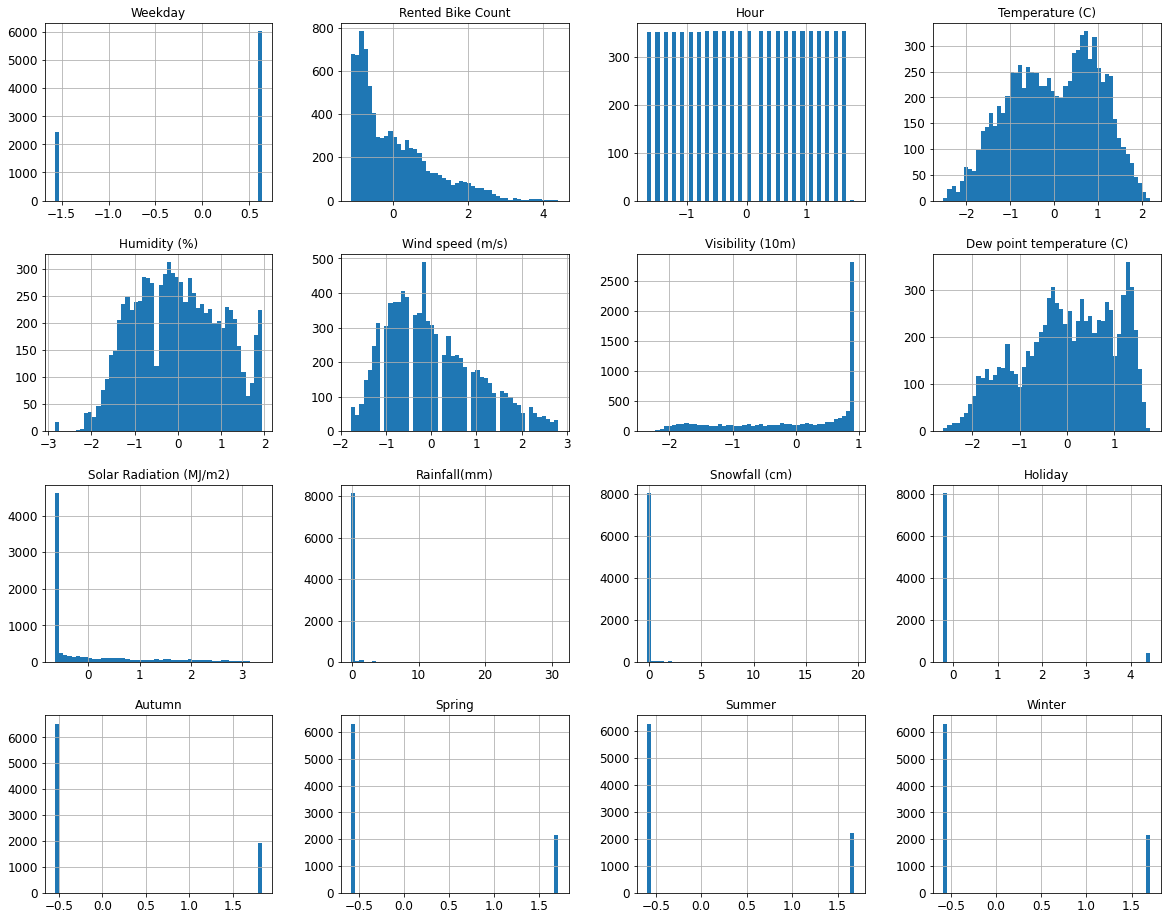

In [37]:
filled_features.hist(bins=50, figsize=(20, 16)) # expected range of each variables??? is it between the range?
plt.show()

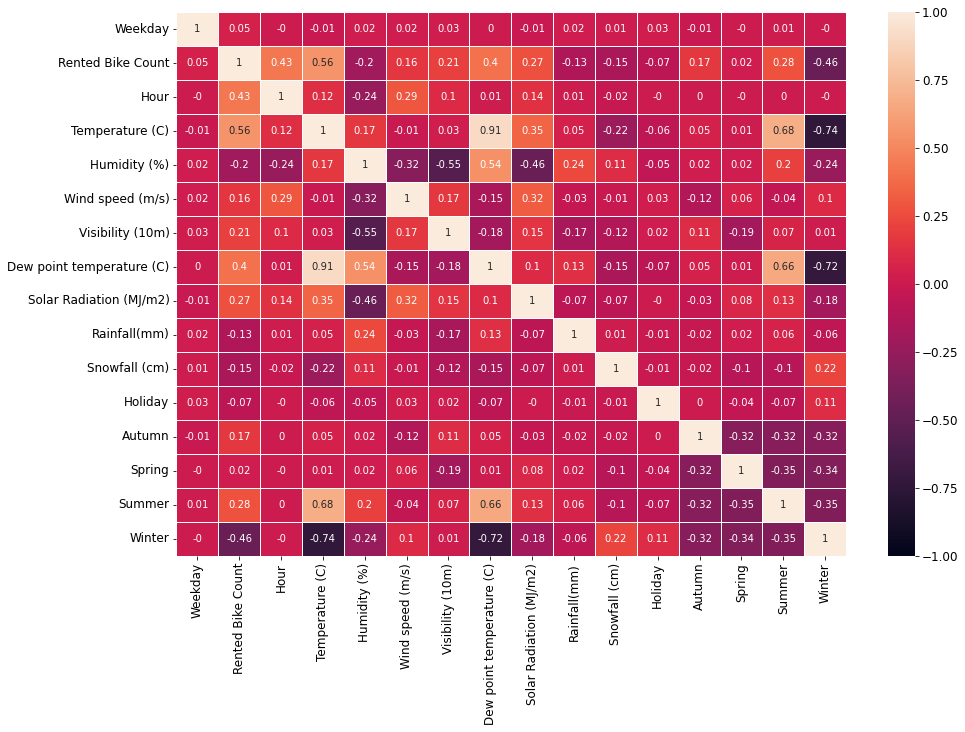

In [38]:
# checking the correlation with temporary version after preprocessing

corr_matrix_temp = filled_features.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix_temp.round(2),vmin=-1, vmax=1, annot=True,linewidth=.5);

In [39]:
# Now we can see which features that is related to our responding variable - Rented Bike Count
corr_matrix_temp["Rented Bike Count"].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature (C)              0.562774
Hour                         0.425460
Dew point temperature (C)    0.400234
Summer                       0.282001
Solar Radiation (MJ/m2)      0.273862
Visibility (10m)             0.210937
Autumn                       0.165333
Wind speed (m/s)             0.155514
Weekday                      0.046360
Spring                       0.015580
Holiday                     -0.070070
Rainfall(mm)                -0.128626
Snowfall (cm)               -0.151611
Humidity (%)                -0.201731
Winter                      -0.458920
Name: Rented Bike Count, dtype: float64

In [40]:
### Your written answer here

#Data leaking may occur if the pre-processed dataset is used once more during the analysis or model-training phases.
#Data leakage happens when information from test or validatation set is accidentally mix into the training set 
#which will lead to misleading evaluation results.The pipeline should be run one time only.

To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`). **Which 3 attributes are the most correlated with bike rentals?**

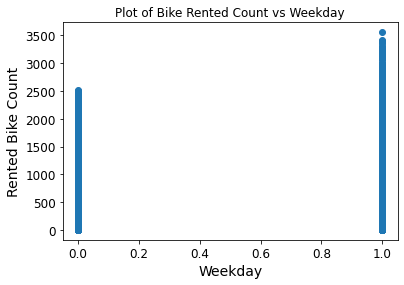

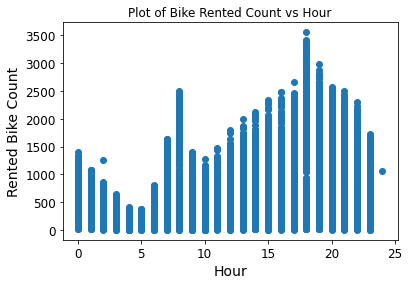

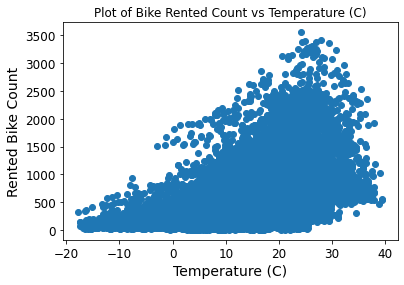

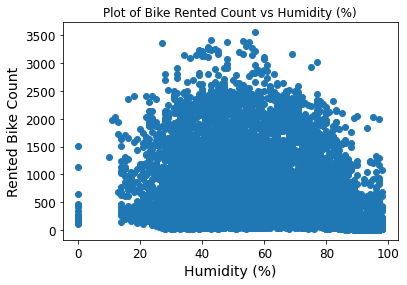

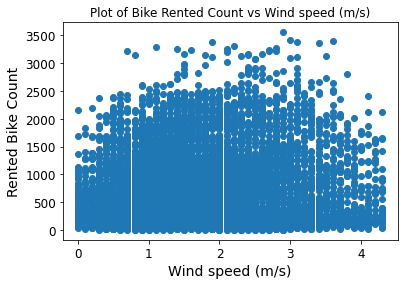

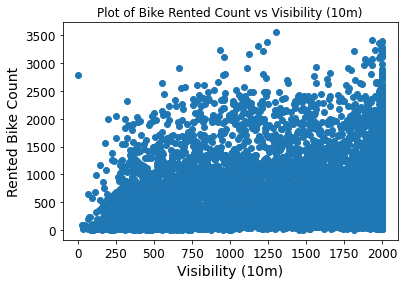

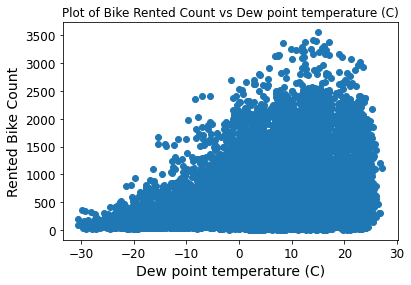

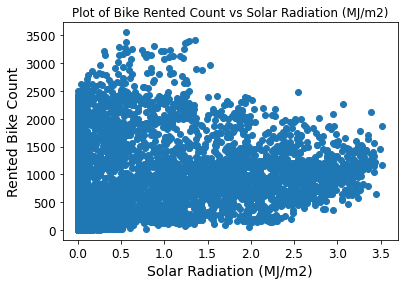

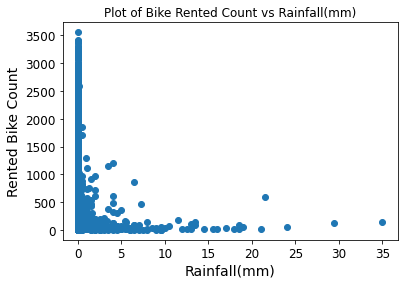

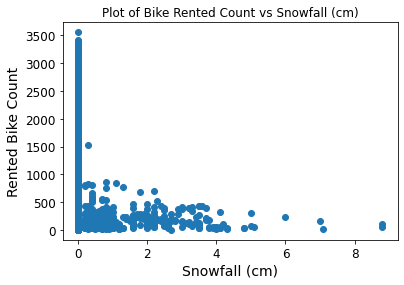

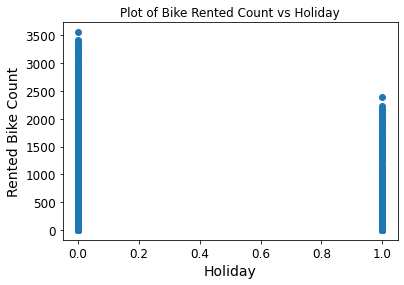

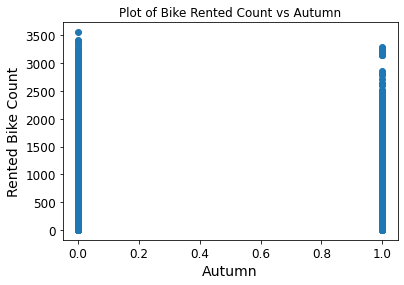

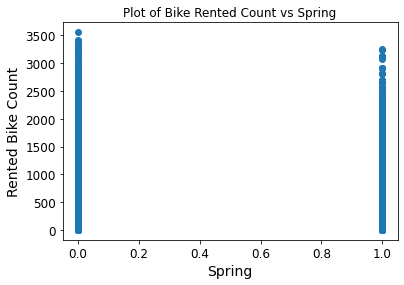

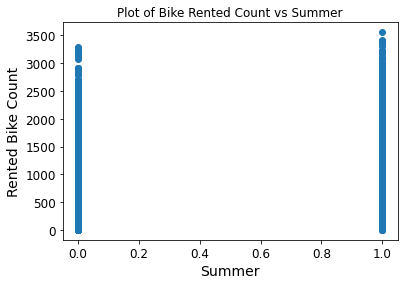

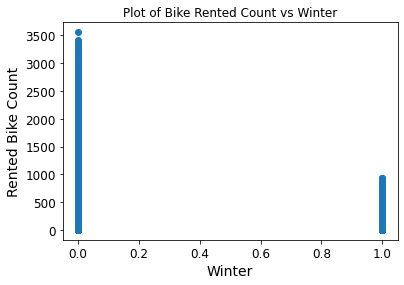

In [41]:
# display a scatter plot for each feature (separately) vs the target variable.
for i in bike.columns:
    if i != "Rented Bike Count":
        plt.scatter(bike[i],bike["Rented Bike Count"])
        plt.title(f"Plot of Bike Rented Count vs {i}")
        plt.xlabel(i)
        plt.ylabel("Rented Bike Count")
        plt.show()

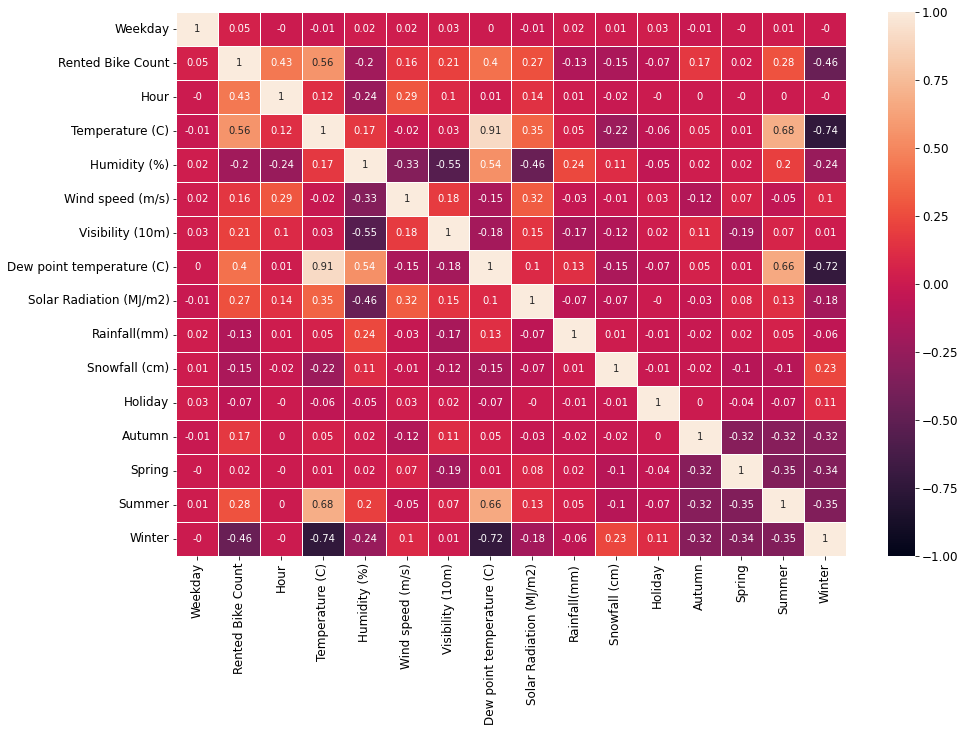

In [42]:
### Your code here
corr_matrix = bike.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix.round(2),vmin=-1, vmax=1, annot=True,linewidth=.5);

In [43]:
# Now we can see which features that is related to our responding variable -Rented Bike Count
abs(corr_matrix["Rented Bike Count"]).sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature (C)              0.562774
Winter                       0.458920
Hour                         0.425460
Dew point temperature (C)    0.400248
Summer                       0.282001
Solar Radiation (MJ/m2)      0.273862
Visibility (10m)             0.210968
Humidity (%)                 0.201755
Autumn                       0.165333
Wind speed (m/s)             0.155672
Snowfall (cm)                0.152261
Rainfall(mm)                 0.129170
Holiday                      0.070070
Weekday                      0.046360
Spring                       0.015580
Name: Rented Bike Count, dtype: float64

In [44]:
### Your written answers here
# 3 attributes are the most correlated with bike rentals:
# 1) Temperature (C) 0.56
# 2) Hour 0.43
# 3) Winter -0.46

## Step 3: Predicting bike rentals (25%)

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (rmse) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Build a pipeline** starting with the one specified in section 2.2 above, and now include a ***linear regression* model**. After you've done this, **fit** this to your training data for a quick test. To get an idea of how successful this model is, **calculate the rmse of the fit to the training data**. To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [45]:
# rearranging the columns
bike.columns

Index(['Weekday', 'Rented Bike Count', 'Hour', 'Temperature (C)',
       'Humidity (%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature (C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', 'Autumn', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [46]:
bike = bike[['Weekday', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Summer', 'Winter', 'Spring', 'Autumn','Rented Bike Count']]

In [47]:
### Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# split the dataset to train and test sets
train_set, test_set = train_test_split(bike,test_size=0.2,
                                   random_state=1873127) # using test size 0.2

# Bike Rented Count is the value we want to predict, 
# so separate it from the other features.
bike_training_features = train_set.drop(["Rented Bike Count"], axis=1)
bike_training_label = train_set["Rented Bike Count"].copy()


In [48]:
# set up the pipeline for linear regression model 
bike_pipeline_lr = Pipeline([
("num_pipeline",num_pipeline),
("lin_reg",LinearRegression())])

# fit the pipeline with training set
bike_pipeline_lr.fit(bike_training_features,bike_training_label)
# Prediction in train set
pred_train_lr = bike_pipeline_lr.predict(bike_training_features)

Show an appropriate **visualisation of the fit for your linear regression.**

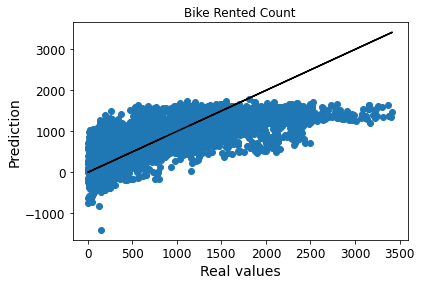

In [49]:
# We can compare with the real output
plt.scatter(bike_training_label,pred_train_lr)
plt.plot(bike_training_label,bike_training_label,'k')
plt.title("Bike Rented Count")
plt.xlabel("Real values")
plt.ylabel("Prediction")
plt.show()

In [50]:
### Your code here
# Load mse function
from sklearn.metrics import mean_squared_error
import math
# Check the performance in train_set
mse_train = mean_squared_error(bike_training_label,pred_train_lr)
rmse_train = math.sqrt(mse_train)
print("The root mean squared error for Linear Regression model is:", rmse_train)

The root mean squared error for Linear Regression model is: 437.18253367818386


In [51]:
# Calculate the baseline RMSE using the mean of the training labels
baseline_predictions = np.full_like(pred_train_lr, bike_training_label.mean())
baseline_rmse = np.sqrt(mean_squared_error(bike_training_label, baseline_predictions))
print("Baseline RMSE:", baseline_rmse)

Baseline RMSE: 645.7268532601996


Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

In [52]:
### Your code here
from sklearn.kernel_ridge import KernelRidge

# set up the pipeline 
bike_pipeline_kr = Pipeline([
("num_pipeline",num_pipeline),
("kernel_ridge",KernelRidge())])

# fit the pipeline with training set
bike_pipeline_kr.fit(bike_training_features,bike_training_label)

# predict with training set
pred_train_kr = bike_pipeline_kr.predict(bike_training_features)

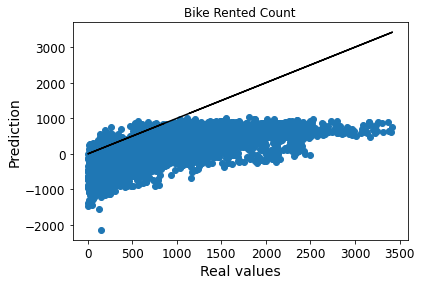

In [53]:
plt.scatter(bike_training_label,pred_train_kr)
plt.plot(bike_training_label,bike_training_label,'k')
plt.title("Bike Rented Count")
plt.xlabel("Real values")
plt.ylabel("Prediction")
plt.show()

In [54]:
print("The root mean squared error in training for Kernel Ridge model is:", 
      mean_squared_error(bike_training_label,pred_train_kr,squared=False))

The root mean squared error in training for Kernel Ridge model is: 853.2134760470726


The third, and most powerful model, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

In [55]:
### Your code here
from sklearn.svm import SVR

# set up the pipeline 
bike_pipeline_svr = Pipeline([
("num_pipeline",num_pipeline),
("svm",SVR())])

# fit the pipeline with training set
bike_pipeline_svr.fit(bike_training_features,bike_training_label)

pred_train_svm = bike_pipeline_svr.predict(bike_training_features)

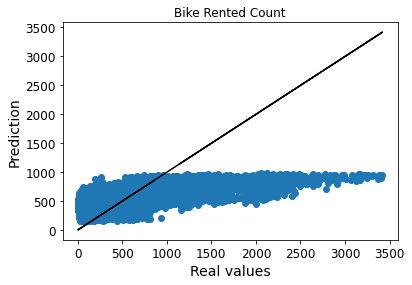

In [56]:
plt.scatter(bike_training_label,pred_train_svm)
plt.plot(bike_training_label,bike_training_label,'k')
plt.title("Bike Rented Count")
plt.xlabel("Real values")
plt.ylabel("Prediction")
plt.show()

In [57]:
print("The root mean squared error in training for Support Vector Machine is:", 
      mean_squared_error(bike_training_label,pred_train_svm,squared=False))

The root mean squared error in training for Support Vector Machine is: 533.7302586709777


## Step 4: Cross validation (20%)

**Perform a *10 fold cross validation* for each model.** This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run.

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** using the same settings/parameters for the models as used above. **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [58]:
bike_training_features = bike_training_features.to_numpy()
bike_training_label = bike_training_label.to_numpy()

In [59]:
### Your code here
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

cvalidate_results_lr = cross_validate(bike_pipeline_lr, 
    bike_training_features, bike_training_label, cv=10, return_train_score=True, scoring='neg_root_mean_squared_error')
mean = pd.Series(-cvalidate_results_lr['train_score']).describe()['mean']
std = pd.Series(-cvalidate_results_lr['train_score']).describe()['std']
print("Mean for RMSE Training set for cross validation is: ",mean)
print("Standard Deviation for RMSE Training set for cross validation is: ",std)

mean = pd.Series(-cvalidate_results_lr['test_score']).describe()['mean']
std = pd.Series(-cvalidate_results_lr['test_score']).describe()['std']
print("Mean for RMSE Validation set for cross validation is: ",mean)
print("Standard Deviation for RMSE Validation set for cross validation is: ",std)

Mean for RMSE Training set for cross validation is:  437.1097527913541
Standard Deviation for RMSE Training set for cross validation is:  2.270989836020325
Mean for RMSE Validation set for cross validation is:  438.01401913546886
Standard Deviation for RMSE Validation set for cross validation is:  21.080483084196686


In [60]:
cvalidate_results_kr = cross_validate(bike_pipeline_kr,
    bike_training_features, bike_training_label, cv=10, return_train_score=True, scoring='neg_root_mean_squared_error')
mean = pd.Series(-cvalidate_results_kr['train_score']).describe()['mean']
std = pd.Series(-cvalidate_results_kr['train_score']).describe()['std']
print("Mean for RMSE Training set for cross validation is: ",mean)
print("Standard Deviation for RMSE Training set for cross validation is: ",std)

mean = pd.Series(-cvalidate_results_kr['test_score']).describe()['mean']
std = pd.Series(-cvalidate_results_kr['test_score']).describe()['std']
print("Mean for RMSE Validation set for cross validation is: ",mean)
print("Standard Deviation for RMSE Validation set for cross validation is: ",std)

Mean for RMSE Training set for cross validation is:  853.1767570772852
Standard Deviation for RMSE Training set for cross validation is:  2.7985795581455735
Mean for RMSE Validation set for cross validation is:  853.7666022918895
Standard Deviation for RMSE Validation set for cross validation is:  16.893175903935266


In [61]:
cvalidate_results_svr = cross_validate(bike_pipeline_svr, 
    bike_training_features, bike_training_label, cv=10, return_train_score=True, scoring='neg_root_mean_squared_error')
mean = pd.Series(-cvalidate_results_svr['train_score']).describe()['mean']
std = pd.Series(-cvalidate_results_svr['train_score']).describe()['std']
print("Mean for RMSE Training set for cross validation is: ",mean)
print("Standard Deviation for RMSE Training set for cross validation is: ",std)

mean = pd.Series(-cvalidate_results_svr['test_score']).describe()['mean']
std = pd.Series(-cvalidate_results_svr['test_score']).describe()['std']
print("Mean for RMSE Validation set for cross validation is: ",mean)
print("Standard Deviation for RMSE Validation set for cross validation is: ",std)

Mean for RMSE Training set for cross validation is:  542.013419376091
Standard Deviation for RMSE Training set for cross validation is:  2.193698284203155
Mean for RMSE Validation set for cross validation is:  542.044054196075
Standard Deviation for RMSE Validation set for cross validation is:  22.102408069162312


On the basis of the results you found above, would you say that any of the models were **under-fitting or over-fitting**?  

**Which method do you think is the best** out of these three?

In [62]:
### Your answer here

# As for the Linear Regression model, it has slightly higher RMSE on their validation set over training set.
# This suggest that the model is slightly overfitting the data. 
# But on overall, all three models performs really well which is
# indicated that the models are not overfitting the training data and is generalizing well to unseen data.

# For the Support Vector Regressor  and Kernel Ridge models, it shows that both models in training set and validation 
# set have approximately similar.This suggest that suggests that both model performance's is consistent between 
# the training and validation data. This can be considered a positive sign indicating that the model is not overfitting 
#the training data and is generalizing well to unseen data.

# The best method is Linear Regression model because it has lowest RMSE compared to other models.
# The standard deviation for validation set in linear regression model is 21.08. 
# This is reasonable number of standard deviation. it shows the combination during cross validation 
# is approximately similar accross the process.
# This can be considered a positive sign indicating that the model is not overfitting.
# This indicate that Linear Regression model is predicting closer to the true values.

## Step 5: Grid parameter search (15%)

Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. **Choose either the KernelRidge or SVR** (your choice entirely), and use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function `GridSearchCV` to do this. 

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.

**Print out the hyperparameter setting** for the best (i.e. chosen) method. 

Finally, **train and apply your chosen method**, with appropriate hyperparameter settings, to the ***test set* and report the performance**. 

In [63]:
### Your code here
from sklearn.model_selection import GridSearchCV
svr_model = SVR()
bike_pipeline_svr.get_params()

{'memory': None,
 'steps': [('num_pipeline',
   Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                   ('standardize', StandardScaler())])),
  ('svm', SVR())],
 'verbose': False,
 'num_pipeline': Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                 ('standardize', StandardScaler())]),
 'svm': SVR(),
 'num_pipeline__memory': None,
 'num_pipeline__steps': [('impute', SimpleImputer(strategy='median')),
  ('standardize', StandardScaler())],
 'num_pipeline__verbose': False,
 'num_pipeline__impute': SimpleImputer(strategy='median'),
 'num_pipeline__standardize': StandardScaler(),
 'num_pipeline__impute__add_indicator': False,
 'num_pipeline__impute__copy': True,
 'num_pipeline__impute__fill_value': None,
 'num_pipeline__impute__missing_values': nan,
 'num_pipeline__impute__strategy': 'median',
 'num_pipeline__impute__verbose': 'deprecated',
 'num_pipeline__standardize__copy': True,
 'num_pipeline__standardize__with_mean': True,
 'num_pipeli

In [64]:
parameters = {'svm__C': [0.1,1, 10, 100],'kernel'}

clf = GridSearchCV(bike_pipeline_svr,parameters,scoring='neg_root_mean_squared_error')
clf.fit(bike_training_features, bike_training_label)

GridSearchCV(estimator=Pipeline(steps=[('num_pipeline',
                                        Pipeline(steps=[('impute',
                                                         SimpleImputer(strategy='median')),
                                                        ('standardize',
                                                         StandardScaler())])),
                                       ('svm', SVR())]),
             param_grid={'svm__C': [0.1, 1, 10, 100]},
             scoring='neg_root_mean_squared_error')

In [65]:
print(clf.best_estimator_)

Pipeline(steps=[('num_pipeline',
                 Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                                 ('standardize', StandardScaler())])),
                ('svm', SVR(C=100))])


In [66]:
clf.best_estimator_.fit(bike_training_features,bike_training_label)

Pipeline(steps=[('num_pipeline',
                 Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                                 ('standardize', StandardScaler())])),
                ('svm', SVR(C=100))])

In [67]:
bike_test_features = test_set.drop(["Rented Bike Count"], axis=1) 
bike_test_label = test_set["Rented Bike Count"].copy()

y_pred_train = clf.best_estimator_.predict(bike_training_features)
y_pred_test = clf.best_estimator_.predict(bike_test_features)


C:\Users\PUTRI KHALILAH\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


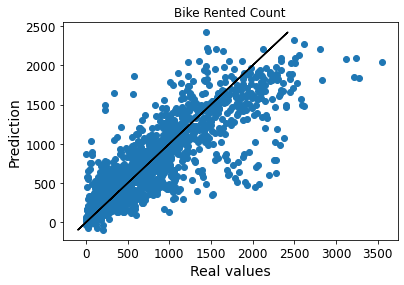

In [68]:
plt.scatter(bike_test_label,y_pred_test)
plt.plot(y_pred_test,y_pred_test,'k')
plt.title("Bike Rented Count")
plt.xlabel("Real values")
plt.ylabel("Prediction")
plt.show()

In [69]:
print(f'Best score is {-clf.best_score_} for best params of {clf.best_params_}')
print("The root mean squared error in training for Support Vector Regressor is:", 
      mean_squared_error(bike_training_label,y_pred_train,squared=False))
print("The root mean squared error in testing for Support Vector Regressor is:", 
      mean_squared_error(bike_test_label,y_pred_test,squared=False))

Best score is 338.5079041455602 for best params of {'svm__C': 100}
The root mean squared error in training for Support Vector Regressor is: 329.64820995191053
The root mean squared error in testing for Support Vector Regressor is: 321.7854680546915


**How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?**

In [70]:
### Your answers here

# The test set performance is doing better where the RMSE scores at 321.78 compare to validation set performance
# which is 338.51. This suggest that Support Vector Regressor indicates that is performing well on unseen data.
# Support Vector Regressor is able to generalize on unseen and new sample data.

# Lower RMSE value indicates the model prediction on the testing data set are closer to the true values 
# compared to the validation set. All three values of RMSE in training, validatio and testing sets are approximately 
# closer to each other. This is suggesting that the model is not overfitting nor underfitting the data.
# The model is not just trying to fit well the data but capturing the underlying relationship present in the unseen data.